#### why?

linear regression algorithims rely on the data having a linear pattern. this can be better if the data has seasonal trends aswell as complex curves.

#### Step 1

Import the needed frameworks

In [27]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle
import os

#### Step 2

create a data frame by reading the csv file, this is what you will plot the training data on

In [28]:
# Create a data frame from the csv file
training_data = pd.read_csv("train_dataset.csv")

x_name = ['YEAR']
y_name = 'state_total'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

#### Step 3

This cell is designed to visualize the relationship between the independent variable(s) (x) and the dependent variable (y) in the context of a regression model. The visualization adapts based on the number of input features (x_name), ensuring flexibility for both single-feature and multi-feature datasets.

Purpose of the C


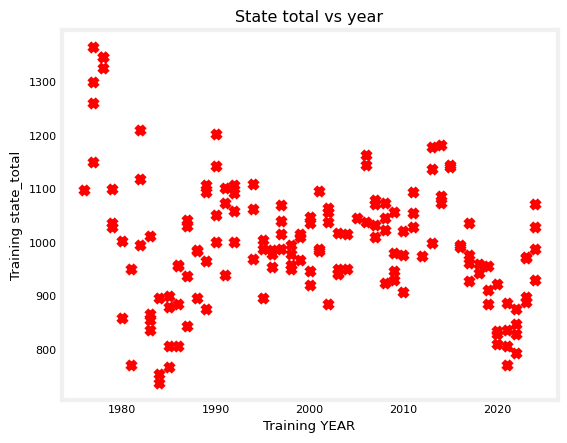

In [29]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("State total vs year")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("State total vs year")
plt.show()

#### Step 4

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

1. **Training Data**: 
   - The actual training data points (`X_train` vs. `y_train`) are plotted as red scatter points to show the observed values.
   - The regression line for the training data (`X_train` vs. `y_pred_train`) is plotted in blue to represent the model's fit to the training data.

2. **Testing Data**:
   - The actual testing data points (`X_test` vs. `y_test`) are plotted as green scatter points to show the observed values in the test set.
   - The predicted values for the test data (`X_test` vs. `y_pred_test`) are plotted as orange scatter points to visualize how well the model generalizes to unseen data.

3. **Labels and Title**:
   - The x-axis is labeled as "YEAR" to indicate the independent variable.
   - The y-axis is labeled as "TOTAL" to represent the dependent variable.
   - The plot is titled "Linear Regression (YEAR vs TOTAL)" to provide context for the visualization.

4. **Legend**:
   - A legend is added to differentiate between the training data, test data, regression line, and predicted test values.

This visualization helps assess the model's performance by comparing the regression line and predicted values against the actual data points for both the training and testing datasets.

In [30]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

#### Step 5:

this cell visualizes the predictions of a polynomial regression against the actual target values and generates a subplot for it.

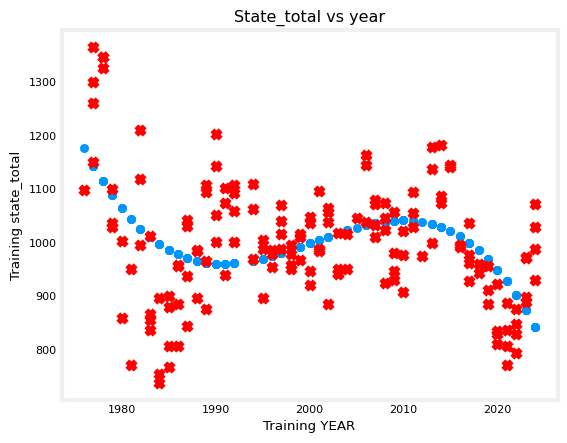

In [31]:
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("State_total vs year")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("State_total vs year")
plt.show()

#### Step 6:

save the model

In [32]:
# Ensure the directory exists
output_dir = 'Model_Testing_and_Validation'
os.makedirs(output_dir, exist_ok=True)

# Save the model to disk
filename = 'my_saved_model_v3.sav'
file_path = os.path.join(output_dir, filename)
pickle.dump(my_model, open(file_path, 'wb'))

print(f"Model saved successfully at: {file_path}")

Model saved successfully at: Model_Testing_and_Validation/my_saved_model_v3.sav
